In [2]:
!pwd

/home/train51/AITP2020-DS-Challenge/code


In [3]:
import os
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import cartopy.crs as ccrs                   # import projections
import cartopy.feature as cf                 # import features

In [4]:
os.environ['MKL_NUM_THREADS'] = '24'

# Data

In [5]:
trees = pd.read_feather('../data/TREE.feather')

In [6]:
trees.head()

,CN,PLT_CN,PREV_TRE_CN,INVYR,STATECD,UNITCD,COUNTYCD,PLOT,SUBP,TREE,...,CORE_LENGTH_PNWRS,CULTURALLY_KILLED_PNWRS,DIA_EST_PNWRS,GST_PNWRS,INC10YR_PNWRS,INC5YRHT_PNWRS,INC5YR_PNWRS,RING_COUNT_INNER_2INCHES_PNWRS,RING_COUNT_PNWRS,SNAG_DIS_CD_PNWRS
0,157582304010854,157499420010854,NaN,1972,1,1,3,90001,101,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,157582305010854,157499420010854,NaN,1972,1,1,3,90001,101,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,157582306010854,157499420010854,NaN,1972,1,1,3,90001,101,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,157582307010854,157499420010854,NaN,1972,1,1,3,90001,101,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,157582308010854,157499420010854,NaN,1972,1,1,3,90001,101,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
plots = pd.read_feather('../data/PLOT.feather')
plots.head()

,CN,SRV_CN,CTY_CN,PREV_PLT_CN,INVYR,STATECD,UNITCD,COUNTYCD,PLOT,PLOT_STATUS_CD,...,MANUAL_NERS,MANUAL_RMRS,PAC_ISLAND_PNWRS,PLOT_SEASON_NERS,PRECIPITATION,PREV_MICROPLOT_LOC_RMRS,PREV_PLOT_STATUS_CD_RMRS,REUSECD1,REUSECD2,REUSECD3
0,43294882010478,43012523010478,379010478,NaN,2000,1,3,5,61,1.0,...,NaN,NaN,None,NaN,NaN,None,NaN,NaN,NaN,NaN
1,43579103010478,43012523010478,433010478,NaN,2000,1,3,113,76,1.0,...,NaN,NaN,None,NaN,NaN,None,NaN,NaN,NaN,NaN
2,43579597010478,43012523010478,433010478,NaN,2000,1,3,113,49,1.0,...,NaN,NaN,None,NaN,NaN,None,NaN,NaN,NaN,NaN
3,43476273010478,43012523010478,421010478,NaN,2000,1,6,89,86,1.0,...,NaN,NaN,None,NaN,NaN,None,NaN,NaN,NaN,NaN
4,47436461010478,43012523010478,421010478,NaN,2000,1,6,89,34,1.0,...,NaN,NaN,None,NaN,NaN,None,NaN,NaN,NaN,NaN


In [8]:
species = pd.read_feather('../data/SPECIES.feather')
species.head()

,SPCD,COMMON_NAME,GENUS,SPECIES,VARIETY,SUBSPECIES,SPECIES_SYMBOL,E_SPGRPCD,W_SPGRPCD,C_SPGRPCD,...,STANDING_DEAD_DECAY_RATIO3,STANDING_DEAD_DECAY_RATIO4,STANDING_DEAD_DECAY_RATIO5,CREATED_BY,CREATED_DATE,CREATED_IN_INSTANCE,MODIFIED_BY,MODIFIED_DATE,MODIFIED_IN_INSTANCE,DRYWT_TO_GREENWT_CONVERSION
0,896,Java plum,Syzygium,cumini,None,None,SYCU,43,47,NaN,...,0.647,0.541,0.541,NaN,2005-02-24,333,NaN,2017-02-16,798795.0,1.758474
1,897,tamarind,Tamarindus,indica,None,None,TAIN2,43,47,54.0,...,0.647,0.541,0.541,NaN,2005-02-24,333,NaN,2017-02-16,798795.0,1.758474
2,901,black locust,Robinia,pseudoacacia,None,None,ROPS,42,47,NaN,...,0.618,0.525,0.525,NaN,2005-02-24,333,NaN,2017-02-16,798795.0,1.437434
3,902,New Mexico locust,Robinia,neomexicana,None,None,RONE,48,48,NaN,...,0.618,0.525,0.525,NaN,2005-02-24,333,NaN,2017-02-16,798795.0,1.439062
4,906,"Everglades palm, paurotis-palm",Acoelorraphe,wrightii,None,None,ACWR4,43,47,NaN,...,0.647,0.541,0.541,NaN,2005-02-24,333,NaN,2017-02-16,798795.0,1.758474


Stage 1: Data Extraction

In [9]:
# trees.astype(dtype={"CN":"int"})

Stage 2: Data Validation

In [10]:
trees.head()

,CN,PLT_CN,PREV_TRE_CN,INVYR,STATECD,UNITCD,COUNTYCD,PLOT,SUBP,TREE,...,CORE_LENGTH_PNWRS,CULTURALLY_KILLED_PNWRS,DIA_EST_PNWRS,GST_PNWRS,INC10YR_PNWRS,INC5YRHT_PNWRS,INC5YR_PNWRS,RING_COUNT_INNER_2INCHES_PNWRS,RING_COUNT_PNWRS,SNAG_DIS_CD_PNWRS
0,157582304010854,157499420010854,NaN,1972,1,1,3,90001,101,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,157582305010854,157499420010854,NaN,1972,1,1,3,90001,101,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,157582306010854,157499420010854,NaN,1972,1,1,3,90001,101,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,157582307010854,157499420010854,NaN,1972,1,1,3,90001,101,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,157582308010854,157499420010854,NaN,1972,1,1,3,90001,101,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
trees.head()

,CN,PLT_CN,PREV_TRE_CN,INVYR,STATECD,UNITCD,COUNTYCD,PLOT,SUBP,TREE,...,CORE_LENGTH_PNWRS,CULTURALLY_KILLED_PNWRS,DIA_EST_PNWRS,GST_PNWRS,INC10YR_PNWRS,INC5YRHT_PNWRS,INC5YR_PNWRS,RING_COUNT_INNER_2INCHES_PNWRS,RING_COUNT_PNWRS,SNAG_DIS_CD_PNWRS
0,157582304010854,157499420010854,NaN,1972,1,1,3,90001,101,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,157582305010854,157499420010854,NaN,1972,1,1,3,90001,101,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,157582306010854,157499420010854,NaN,1972,1,1,3,90001,101,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,157582307010854,157499420010854,NaN,1972,1,1,3,90001,101,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,157582308010854,157499420010854,NaN,1972,1,1,3,90001,101,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
trees_x = pd.merge(trees.sample(10000), species, left_on='SPCD', right_on='SPCD', how='left')
trees_x.head()

,CN,PLT_CN,PREV_TRE_CN,INVYR,STATECD,UNITCD,COUNTYCD,PLOT,SUBP,TREE,...,STANDING_DEAD_DECAY_RATIO3,STANDING_DEAD_DECAY_RATIO4,STANDING_DEAD_DECAY_RATIO5,CREATED_BY_y,CREATED_DATE_y,CREATED_IN_INSTANCE_y,MODIFIED_BY_y,MODIFIED_DATE_y,MODIFIED_IN_INSTANCE_y,DRYWT_TO_GREENWT_CONVERSION
0,12334002010690,12333956010690,NaN,2007,30,5,1,95676,2,13,...,1.020,0.727,0.727,NaN,2005-02-24,333,NaN,2017-02-16,798795.0,1.644737
1,160935673010854,160403778010854,NaN,1987,28,3,101,90038,106,3,...,0.618,0.525,0.525,NaN,2005-02-24,333,NaN,2017-02-16,798795.0,1.974785
2,161355478010854,161204151010854,NaN,1974,37,2,117,90099,110,2,...,0.526,0.525,0.525,NaN,2005-02-24,333,NaN,2017-02-16,798795.0,1.761941
3,165777094020004,247101747010661,1.596051e+14,2012,29,3,105,20082,2,13,...,0.332,0.396,0.396,NaN,2005-02-24,333,NaN,2017-02-16,798795.0,1.624375
4,2320922010690,2320913010690,NaN,2003,30,1,29,86323,1,4,...,0.927,0.598,0.598,NaN,2005-02-24,333,NaN,2017-02-16,798795.0,1.751189


In [13]:
trees.shape

(21950003, 207)

In [14]:
trees['CN'].value_counts()


164174505010854    1
157820216010854    1
158896838010854    1
158333325010854    1
55092852010661     1
                  ..
259621924010854    1
247496798010854    1
3160325010661      1
22625446010661     1
22913366010661     1
Name: CN, Length: 21950003, dtype: int64

In [15]:
trees['SPCD'].head()


0    693
1    693
2    221
3    221
4    693
Name: SPCD, dtype: int16

In [16]:
pd.isnull(trees['CN'].value_counts())

164174505010854    False
157820216010854    False
158896838010854    False
158333325010854    False
55092852010661     False
                   ...  
259621924010854    False
247496798010854    False
3160325010661      False
22625446010661     False
22913366010661     False
Name: CN, Length: 21950003, dtype: bool

In [17]:
trees_ct_non_nan = trees.count()
trees_ct_non_nan

CN                                21950003
PLT_CN                            21950003
PREV_TRE_CN                        6965136
INVYR                             21950003
STATECD                           21950003
                                    ...   
INC5YRHT_PNWRS                       17406
INC5YR_PNWRS                        130228
RING_COUNT_INNER_2INCHES_PNWRS        2383
RING_COUNT_PNWRS                      2388
SNAG_DIS_CD_PNWRS                    29775
Length: 207, dtype: int64

In [19]:
# len(trees_ct)

In [20]:
trees_count_nan = len(trees) - trees.count()

In [21]:
trees_count_nan

CN                                       0
PLT_CN                                   0
PREV_TRE_CN                       14984867
INVYR                                    0
STATECD                                  0
                                    ...   
INC5YRHT_PNWRS                    21932597
INC5YR_PNWRS                      21819775
RING_COUNT_INNER_2INCHES_PNWRS    21947620
RING_COUNT_PNWRS                  21947615
SNAG_DIS_CD_PNWRS                 21920228
Length: 207, dtype: int64

In [23]:
# count NaN values for species
trees_count_nan['SPCD']

0

In [24]:
# count NaN values for height
trees_count_nan['HT']

7409886

In [25]:
prop_height_missing = trees_count_nan['HT']/len(trees)
prop_height_missing

0.3375801816519114

In [26]:
prop_height_missing= trees_count_nan['HT']/len(trees)
prop_height_missing
print("prop_height_missing: ",prop_height_missing)

prop_height_missing:  0.3375801816519114


In [27]:
# count NaN values for actual height
trees_count_nan['ACTUALHT']

9720199

In [28]:
prop_actual_height_missing= trees_count_nan['ACTUALHT']/len(trees)
prop_actual_height_missing
print("prop_actual_height_missing: ",prop_actual_height_missing)

prop_actual_height_missing:  0.44283360690201273


In [29]:
prop_TREECLCD_missing= trees_count_nan['TREECLCD']/len(trees)
print("prop_TREECLCD_missing: ",prop_TREECLCD_missing)

prop_TREECLCD_missing:  0.08078613930029986


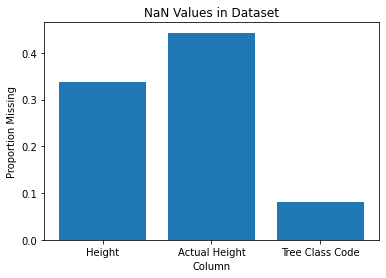

In [30]:
D = {u'Height':prop_height_missing, u'Actual Height': prop_actual_height_missing, u'Tree Class Code':prop_TREECLCD_missing}

plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
# # for python 2.x:
# plt.bar(range(len(D)), D.values(), align='center')  # python 2.x
# plt.xticks(range(len(D)), D.keys())  # in python 2.x

plt.title("NaN Values in Dataset")
plt.ylabel("Proportion Missing")
plt.xlabel("Column")
plt.show()

# sns.set(style="whitegrid")

In [31]:
trees['height check/'] = np.where(trees['ACTUALHT'] <= trees['HT'], 'smaller', 'missing')

In [32]:
trees.head()

,CN,PLT_CN,PREV_TRE_CN,INVYR,STATECD,UNITCD,COUNTYCD,PLOT,SUBP,TREE,...,CULTURALLY_KILLED_PNWRS,DIA_EST_PNWRS,GST_PNWRS,INC10YR_PNWRS,INC5YRHT_PNWRS,INC5YR_PNWRS,RING_COUNT_INNER_2INCHES_PNWRS,RING_COUNT_PNWRS,SNAG_DIS_CD_PNWRS,height check/
0,157582304010854,157499420010854,NaN,1972,1,1,3,90001,101,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing
1,157582305010854,157499420010854,NaN,1972,1,1,3,90001,101,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing
2,157582306010854,157499420010854,NaN,1972,1,1,3,90001,101,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing
3,157582307010854,157499420010854,NaN,1972,1,1,3,90001,101,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing
4,157582308010854,157499420010854,NaN,1972,1,1,3,90001,101,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing


In [33]:
trees['ACTUALHT'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: ACTUALHT, dtype: float32

In [34]:
trees['HT'].head()


0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: HT, dtype: float32

In [35]:
trees_height_notna = trees[trees['HT'].notna()]

In [36]:
trees_height_notna.head()

,CN,PLT_CN,PREV_TRE_CN,INVYR,STATECD,UNITCD,COUNTYCD,PLOT,SUBP,TREE,...,CULTURALLY_KILLED_PNWRS,DIA_EST_PNWRS,GST_PNWRS,INC10YR_PNWRS,INC5YRHT_PNWRS,INC5YR_PNWRS,RING_COUNT_INNER_2INCHES_PNWRS,RING_COUNT_PNWRS,SNAG_DIS_CD_PNWRS,height check/
120144,157763556010854,157526662010854,NaN,1982,1,1,3,90001,101,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing
120145,157763557010854,157526662010854,NaN,1982,1,1,3,90001,101,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing
120146,157763558010854,157526662010854,NaN,1982,1,1,3,90001,101,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing
120147,157763559010854,157526662010854,NaN,1982,1,1,3,90001,101,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing
120148,157763560010854,157526662010854,NaN,1982,1,1,3,90001,101,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing


In [37]:
trees_height_notna.shape

(14540117, 208)

In [38]:
trees.shape

(21950003, 208)

What is the tallest tree?

In [39]:
trees_height_notna['HT']

120144      60.0
120145      66.0
120146      25.0
120147      58.0
120148      60.0
            ... 
21949998    31.0
21949999    27.0
21950000    36.0
21950001    17.0
21950002    27.0
Name: HT, Length: 14540117, dtype: float32

In [40]:
trees_height_notna['HT'].max()

999.0

The tallest tree in the world is in California. According to LiveScience, "Among the redwoods, a tree named Hyperion dwarfs them all. The tree was discovered in 2006, and is 379.7 feet (115.7 m) tall"
https://www.livescience.com/28729-tallest-tree-in-world.html

Thus, some of the height data is bad. Let's remove it!

In [41]:
trees_height_notna=trees_height_notna[(trees_height_notna['HT'] < 380)]
trees_height_notna=trees_height_notna[trees_height_notna['HT'] > 0]

In [42]:
trees_height_notna.head()

,CN,PLT_CN,PREV_TRE_CN,INVYR,STATECD,UNITCD,COUNTYCD,PLOT,SUBP,TREE,...,CULTURALLY_KILLED_PNWRS,DIA_EST_PNWRS,GST_PNWRS,INC10YR_PNWRS,INC5YRHT_PNWRS,INC5YR_PNWRS,RING_COUNT_INNER_2INCHES_PNWRS,RING_COUNT_PNWRS,SNAG_DIS_CD_PNWRS,height check/
120144,157763556010854,157526662010854,NaN,1982,1,1,3,90001,101,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing
120145,157763557010854,157526662010854,NaN,1982,1,1,3,90001,101,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing
120146,157763558010854,157526662010854,NaN,1982,1,1,3,90001,101,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing
120147,157763559010854,157526662010854,NaN,1982,1,1,3,90001,101,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing
120148,157763560010854,157526662010854,NaN,1982,1,1,3,90001,101,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing


In [43]:
trees_height_notna.size

3023998848


Stage 3 and 4: Descriptive Analysis
    

In [49]:
print('Mean HT: ',trees_height_notna['HT'].mean())
print('Mean ACTUALHT: ',trees_height_notna['ACTUALHT'].mean())

Mean HT:  49.26161575317383
Mean ACTUALHT:  47.98029327392578


In [ ]:
sns.distplot(trees_height_notna['HT'], kde=False, rug=True);

In [ ]:

sns.distplot(trees['ACTUALHT'], kde=False, rug=True);

In [71]:
# trees.groupby('INVYR').mean()

Overall there's a lot of missing height data.

In [57]:
year_means = trees.groupby('INVYR', as_index=False)['HT'].mean()

In [61]:
year_means.head()

,INVYR,HT
0,1968,49.111908
1,1970,48.639450
2,1972,48.520481
3,1974,51.100685
4,1975,NaN


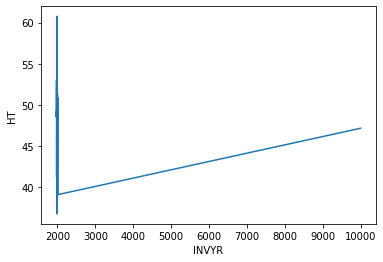

In [59]:
ax = sns.lineplot(x="INVYR", y="HT",

                  data=year_means)

In [64]:
year_means=year_means[(year_means['INVYR'] < 2021)]


In [65]:
trees_height_notna.head()

,CN,PLT_CN,PREV_TRE_CN,INVYR,STATECD,UNITCD,COUNTYCD,PLOT,SUBP,TREE,...,CULTURALLY_KILLED_PNWRS,DIA_EST_PNWRS,GST_PNWRS,INC10YR_PNWRS,INC5YRHT_PNWRS,INC5YR_PNWRS,RING_COUNT_INNER_2INCHES_PNWRS,RING_COUNT_PNWRS,SNAG_DIS_CD_PNWRS,height check/
120144,157763556010854,157526662010854,NaN,1982,1,1,3,90001,101,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing
120145,157763557010854,157526662010854,NaN,1982,1,1,3,90001,101,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing
120146,157763558010854,157526662010854,NaN,1982,1,1,3,90001,101,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing
120147,157763559010854,157526662010854,NaN,1982,1,1,3,90001,101,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing
120148,157763560010854,157526662010854,NaN,1982,1,1,3,90001,101,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing


Text(0.5, 0, 'Year')

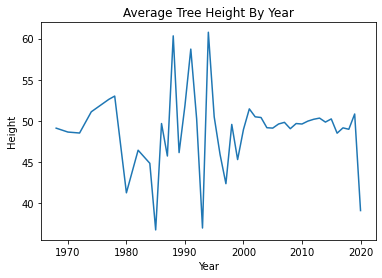

In [74]:
ax = sns.lineplot(x="INVYR", y="HT",

                  data=year_means)
ax.set_title('Average Tree Height By Year')
ax.set_ylabel('Height')
ax.set_xlabel('Year')

In [75]:
trees_dia_notna = trees_height_notna[trees_height_notna['DIA'].notna()]

In [76]:
trees_dia_notna['DIA'].head()

120144    11.4
120145    13.1
120146     6.4
120147    12.3
120148    13.4
Name: DIA, dtype: float32

In [ ]:
ax = sns.lineplot(x="INVYR", y="DIA",

                  data=year_means)
ax.set_title('Average Tree Diameter By Year')
ax.set_ylabel('DIA')
ax.set_xlabel('Year')